In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
CODE_DIR = os.environ['CODEROOT']
sys.path.append(os.path.join(CODE_DIR, 'EPypes'))
sys.path.append(os.path.join(CODE_DIR, 'VisionCG'))

In [4]:
from epypes.compgraph import CompGraph, CompGraphRunner
from visioncg import circles, viz

In [5]:
def find_edges(image, blur_kernel_size, canny_lo, canny_hi):
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(image, (blur_kernel_size, blur_kernel_size), 0)
    edges = cv2.Canny(blurred, canny_lo, canny_hi)

    return edges

In [6]:
#im = cv2.imread('carnd_lanelines_images/solidWhiteRight.jpg')
im = cv2.imread('gearbox.jpg')

In [7]:
BLUR_KERNEL = 15
CANNY_LO = 70
CANNY_HI = 200

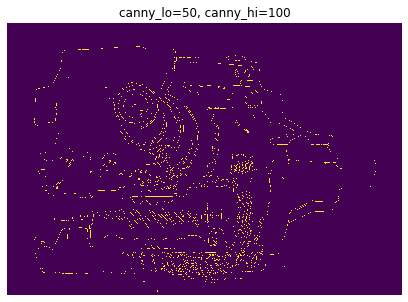

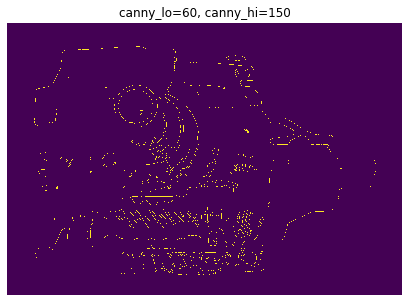

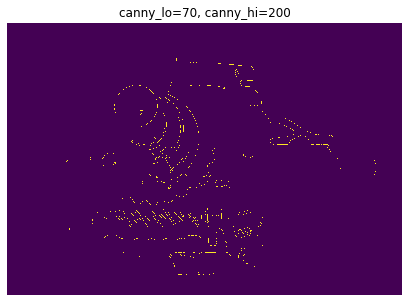

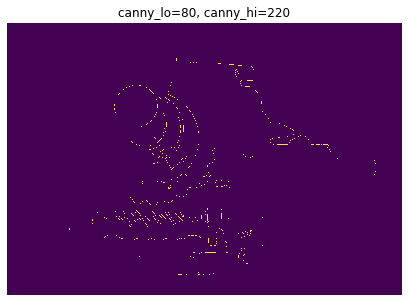

In [8]:
for canny_lo, canny_hi in [(50, 100), (60, 150), (70, 200), (80, 220)]:

    edges = find_edges(im, BLUR_KERNEL, canny_lo, canny_hi)

    plt.figure(figsize=(10, 5))
    plt.imshow(edges)
    plt.axis('off')
    plt.title('canny_lo={}, canny_hi={}'.format(canny_lo, canny_hi))

In [9]:
def grayscale(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

func_dict = {
    'grayscale': grayscale,
    'canny': cv2.Canny,
    'blur': gaussian_blur,
    'hough_circles': circles.hough_circles,
}

func_io = {
    'grayscale': ('image', 'image_gray'),
    'blur': (('image_gray', 'blur_kernel'), 'image_blurred'),
    'canny': (('image_blurred', 'canny_lo', 'canny_hi'), 'edges'),
    'hough_circles': (('edges', 'hough_dp', 'hough_min_dist'), 'circles'),
}

cg = CompGraph(func_dict, func_io)

params = {
    'blur_kernel': 11,
    'canny_lo': 80,
    'canny_hi': 220,
    'hough_dp': 2,
    'hough_min_dist': 5,
}

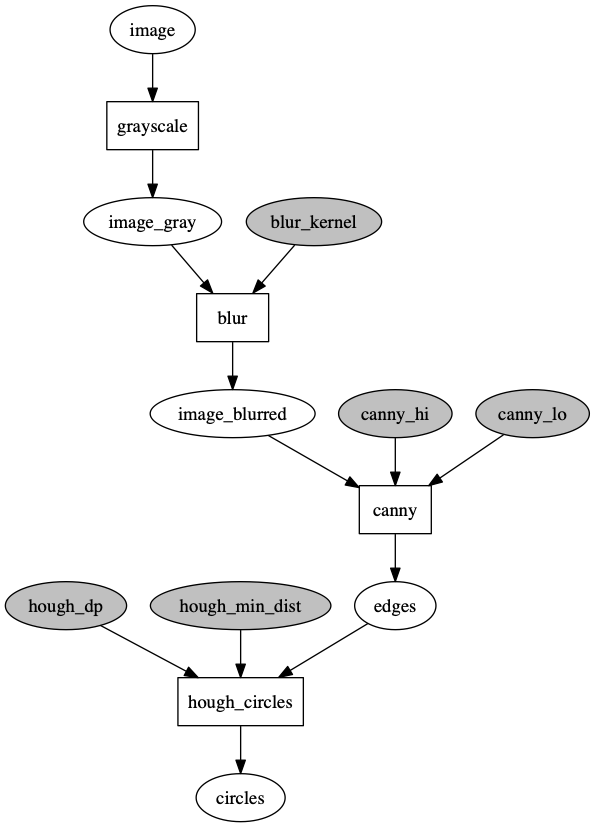

In [10]:
def viz_runner():
    runner = CompGraphRunner(cg, params)
    return nxpd.draw(runner.to_networkx())
    
viz_runner()

(7, 3)


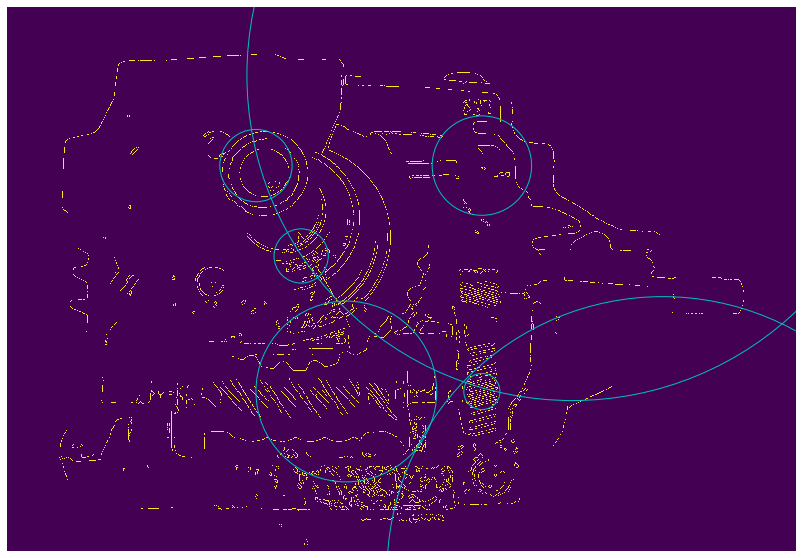

In [11]:
runner = CompGraphRunner(cg, frozen_tokens={
    'blur_kernel': 11,
    'canny_lo': 60,
    'canny_hi': 150,
    'hough_dp': 100,
    'hough_min_dist': 5,
})

runner.run(image=im)

print(runner['circles'].shape)

plt.figure(figsize=(15, 10))
plt.imshow(runner['edges'])
viz.plot_circles(runner['circles'], color='c')
_ = plt.axis('off')